# Jupyter notebook for doing some basic data analysis 
#and running a logisitic regression among other models for find kidney faliures in diabetics


#To configure the Jupyter notebook server on your EC2 instance, you create a configuration file. 
#In the configuration file, you set some of the values to use for web authentication, 
#including the SSL certificate file path, and a password.

#Connect to the EC2 instance . If you have set up a cluster of EC2 instances, connect to the master node.

#Configure the Jupyter server

#Create an SSL certificate.

#Open the iPython terminal.

# include ther rules in the notebook

#add more  comments

#scoring logic


# Loading Packages

In [1]:
#Import statements , laoding basic packages for data analysis
import sys
import logging

import random
import datetime
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
plt.style.use('ggplot')


import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt

plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)




/usr/local/lib64/python3.4/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Next Few sections helps style the notebook output

In [2]:
#Styling the Pandas Data Frames

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from jinja2 import Environment, ChoiceLoader, FileSystemLoader
from IPython.display import HTML
from pandas.io.formats.style import Styler

from IPython.display import display, HTML


In [3]:
%mkdir templates


mkdir: cannot create directory ‘templates’: File exists


In [4]:
%%file templates/myhtml.tpl
{% extends "html.tpl" %}
{% block table %}
<h1>{{ table_title|default("My Table") }}</h1>
{{ super() }}
{% endblock table %}

Overwriting templates/myhtml.tpl


In [5]:
class MyStyler(Styler):
    env = Environment(
        loader=ChoiceLoader([
            FileSystemLoader("templates"),  # contains ours
            Styler.loader,  # the default
        ])
    )
    template = env.get_template("myhtml.tpl")

# Data Analysis  - Connecting to the RDS database , and runnign some basic descriptive analysis

In [6]:
#rds connection paramters
rds_host  = "sd74is1d8txuav.cxy7or0esjwv.us-east-2.rds.amazonaws.com"
name = "master"
password = "4we4df234"
db_name = "diabetes"

In [7]:
# Open database connection using pymysql  and setting index
conn = pymysql.connect(rds_host, user=name, passwd=password, db=db_name, connect_timeout=90)
dfDiabetesStudy = pd.read_sql_query("select * from diabetes.DiabetesStudy", conn, index_col=None, coerce_float=True, params=None, parse_dates=None, chunksize=None)
dfLabs = pd.read_sql_query("select * from diabetes.Labs", conn, index_col=None, coerce_float=True, params=None, parse_dates=None, chunksize=None)
dfLabs.set_index('LabID')
print(dfDiabetesStudy.count())
print(dfLabs.count())


,LabType,PatientID,LabValue,LabDatetime
LabID,,,,
111,HBA1C,1,5.0,1/1/2016 12:00:00 AM
112,HBA1C,1,5.0,2/1/2016 12:00:00 AM
113,HBA1C,1,5.0,3/1/2016 12:00:00 AM
114,HBA1C,1,6.0,4/1/2016 12:00:00 AM
115,HBA1C,1,6.0,5/1/2016 12:00:00 AM
116,HBA1C,1,5.0,6/1/2016 12:00:00 AM
117,HBA1C,1,6.0,7/1/2016 12:00:00 AM
118,HBA1C,1,6.0,8/1/2016 12:00:00 AM
119,HBA1C,1,5.0,9/1/2016 12:00:00 AM


PatientID                 200
PatientGender             200
PatientRace               200
PatientEthnicity          200
HasKidneyDisease          200
HasDiabeticRetinopathy    200
HasHighHBA1C              200
HBA1CCategory             200
GlucoseCategory           200
dtype: int64
LabID          44603
LabType        44603
PatientID      44603
LabValue       44603
LabDatetime    44603
dtype: int64


In [8]:
HTML(dfDiabetesStudy.to_html())

,PatientID,PatientGender,PatientRace,PatientEthnicity,HasKidneyDisease,HasDiabeticRetinopathy,HasHighHBA1C,HBA1CCategory,GlucoseCategory
0,53,F,Asian Indian,Hispanic or Latino,0,0,0,moderate,ok
1,85,M,Asian Indian,Hispanic or Latino,0,0,0,moderate,ok
2,148,M,Asian Indian,Hispanic or Latino,0,0,1,high,moderate
3,137,M,Chinese,Hispanic or Latino,0,0,1,high,moderate
4,78,F,American Indian or Alaska Native,Hispanic or Latino,0,0,0,moderate,ok
5,28,F,Asian Indian,Hispanic or Latino,0,0,0,moderate,ok
6,183,M,Filipino,Hispanic or Latino,1,1,1,high,high
7,101,M,Filipino,Hispanic or Latino,0,0,1,high,moderate
8,115,M,Chinese,Hispanic or Latino,0,0,1,high,moderate
9,81,M,American Indian or Alaska Native,Hispanic or Latino,0,0,0,moderate,ok


In [9]:
dfDiabetesStudy.info()
dfLabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
PatientID                 200 non-null int64
PatientGender             200 non-null object
PatientRace               200 non-null object
PatientEthnicity          200 non-null object
HasKidneyDisease          200 non-null int64
HasDiabeticRetinopathy    200 non-null int64
HasHighHBA1C              200 non-null int64
HBA1CCategory             200 non-null object
GlucoseCategory           200 non-null object
dtypes: int64(4), object(5)
memory usage: 14.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44603 entries, 0 to 44602
Data columns (total 5 columns):
LabID          44603 non-null int64
LabType        44603 non-null object
PatientID      44603 non-null int64
LabValue       44603 non-null float64
LabDatetime    44603 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 1.7+ MB


In [10]:
#Type casting to boolean to make sure that features work
#df['HasKidneyDisease'] = df['HasKidneyDisease'].astype('bool')
#df['HasHighHBA1C'] = df['HasHighHBA1C'].astype('bool')


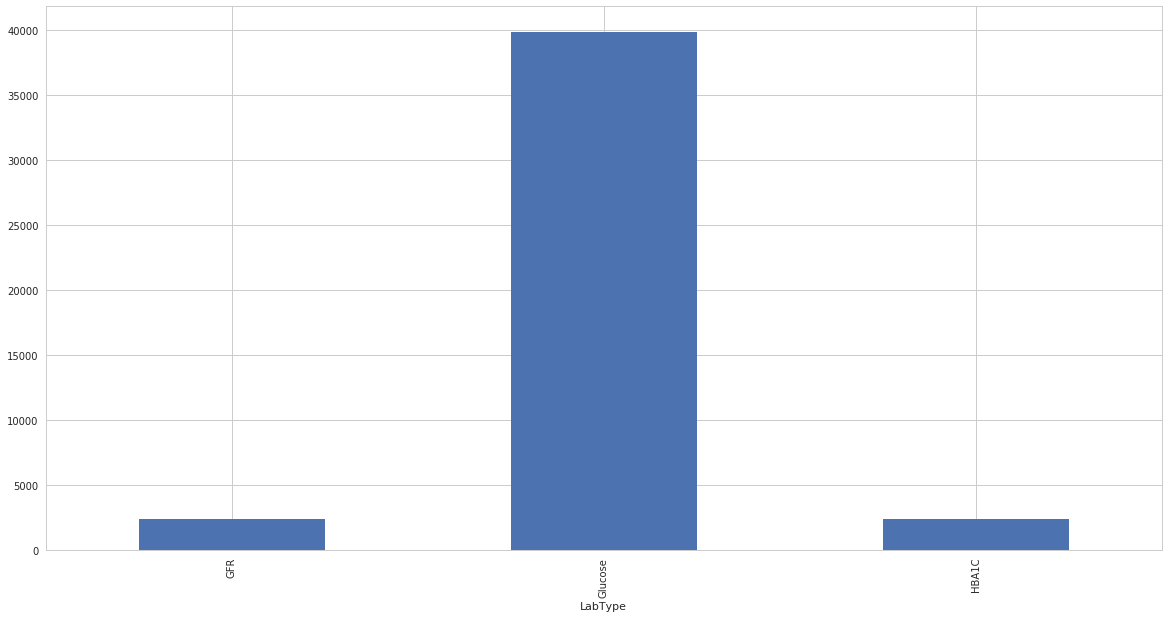

In [11]:
grph = dfLabs.groupby('LabType')['LabValue'].count().plot.bar(grid=True,figsize=(20,10))
plt.show()


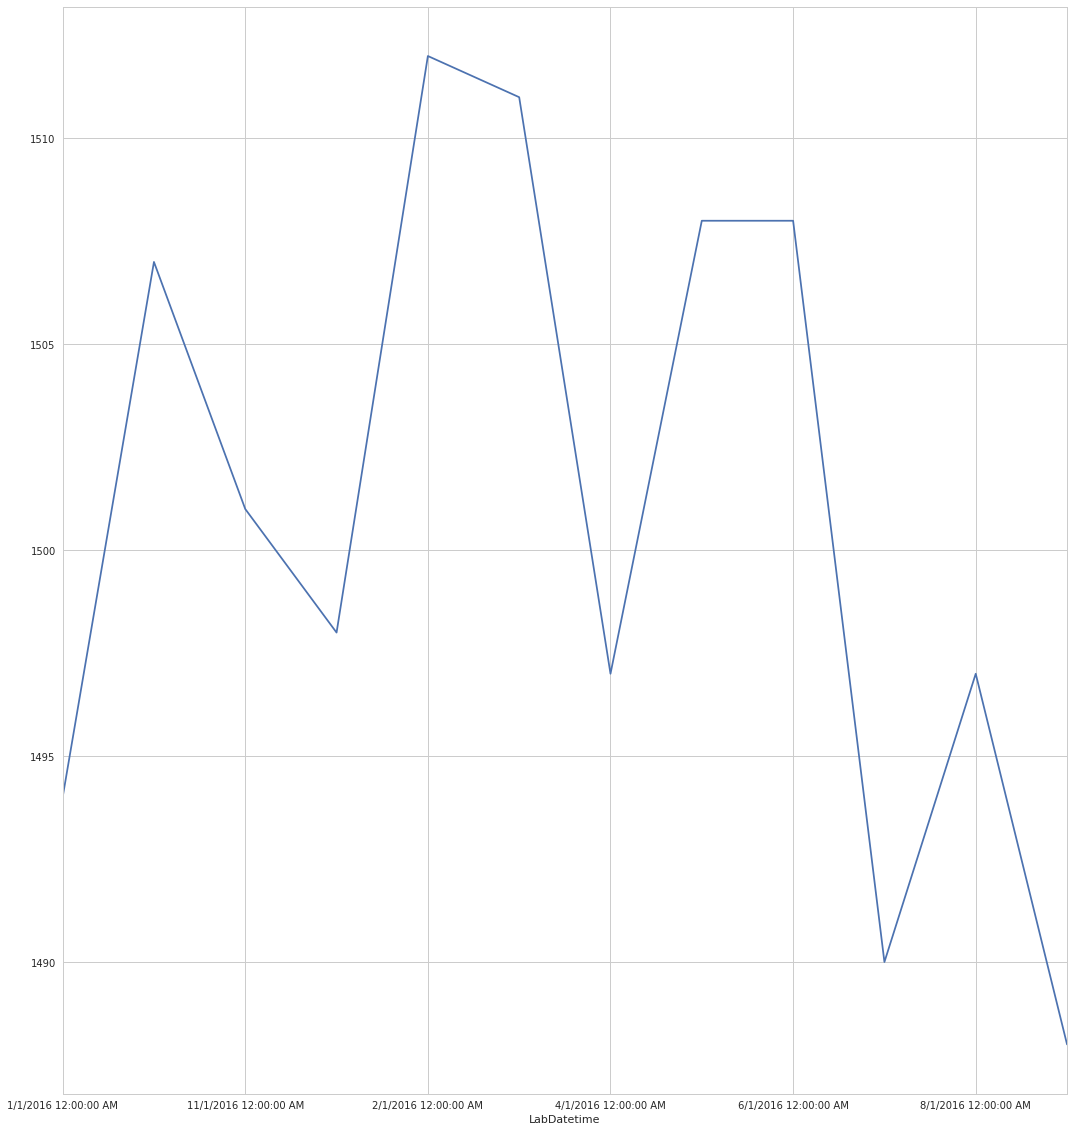

In [12]:
grph = dfLabs[dfLabs['LabType']=='HBA1C'].groupby('LabDatetime')['LabValue'].sum().plot(figsize=(18,20))

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef10604048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fef10964668>]], dtype=object)

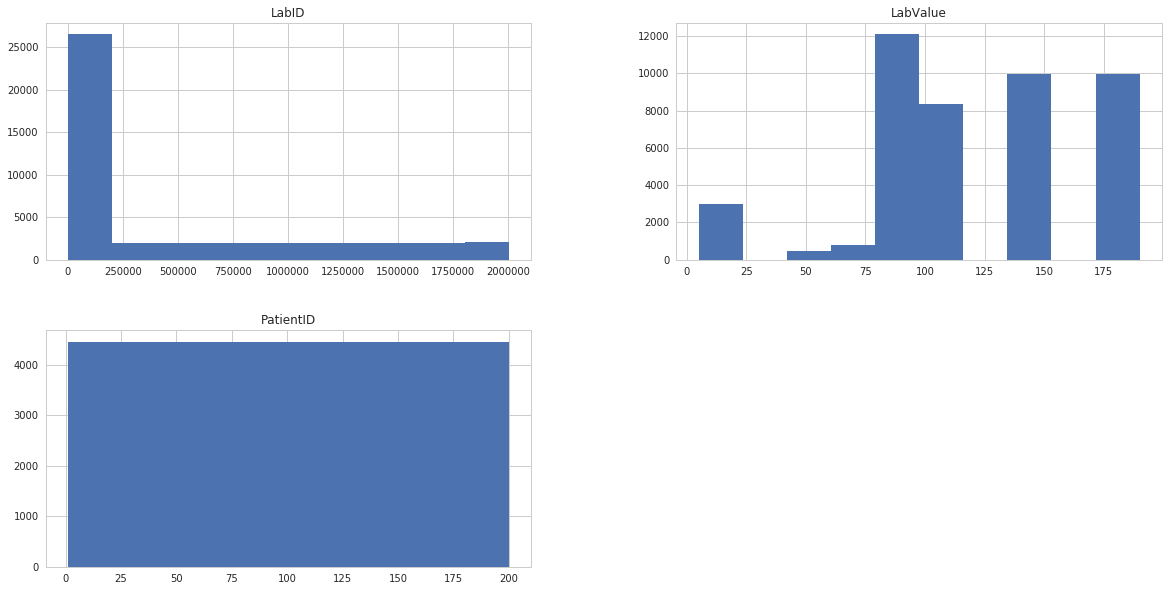

In [13]:
dfLabs.hist(figsize=(20,10))
plt.show()

In [14]:
dfDiabetesStudy.isnull().sum()

PatientID                 0
PatientGender             0
PatientRace               0
PatientEthnicity          0
HasKidneyDisease          0
HasDiabeticRetinopathy    0
HasHighHBA1C              0
HBA1CCategory             0
GlucoseCategory           0
dtype: int64

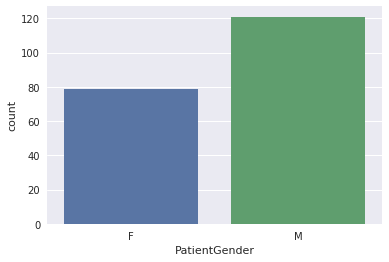

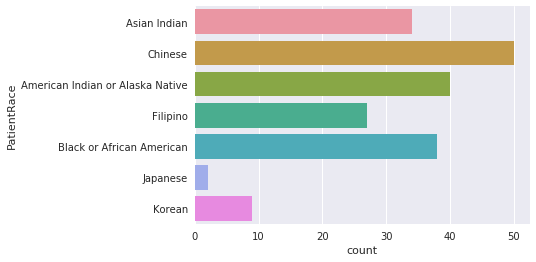

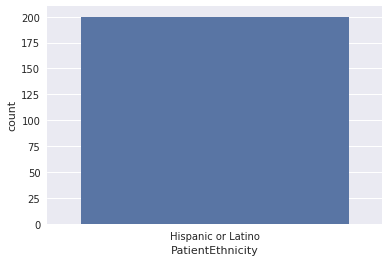

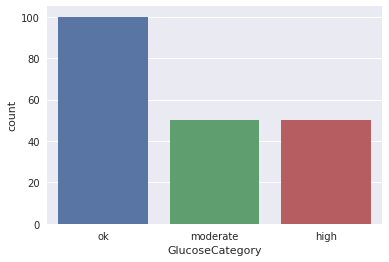

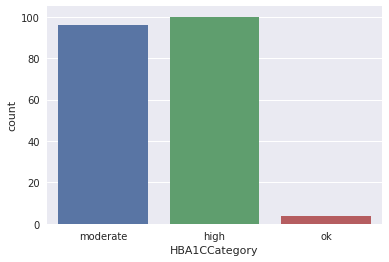

In [60]:
#grph = dfDiabetesStudy.groupby('PatientGender')['PatientID'].count().plot.bar(grid=True,figsize=(20,10))

sns.countplot(x="PatientGender", data=dfDiabetesStudy)
plt.show()

sns.countplot(y="PatientRace", data=dfDiabetesStudy)
plt.show()

sns.countplot(x="PatientEthnicity", data=dfDiabetesStudy)
plt.show()

sns.countplot(x="GlucoseCategory", data=dfDiabetesStudy)
plt.show()

sns.countplot(x="HBA1CCategory", data=dfDiabetesStudy)
plt.show()




In [59]:
dfDiabetesStudy.groupby('HasKidneyDisease').mean()
dfDiabetesStudy.groupby('HasHighHBA1C').mean()
dfDiabetesStudy.groupby('HasDiabeticRetinopathy').mean()



,PatientID,HasDiabeticRetinopathy,HasHighHBA1C
HasKidneyDisease,,,
0,75.5,0.0,0.333333
1,175.5,1.0,1.000000


,PatientID,HasKidneyDisease,HasDiabeticRetinopathy
HasHighHBA1C,,,
0,51.0,0.0,0.0
1,150.0,0.5,0.5


,PatientID,HasKidneyDisease,HasHighHBA1C
HasDiabeticRetinopathy,,,
0,75.5,0.0,0.333333
1,175.5,1.0,1.000000


# One HOT encoding , Data Preparation , Features exploration for Logistic Regression

In [15]:
#Selected Attributes for Machine Learning
dfDiabetesStudySelected = dfDiabetesStudy[['GlucoseCategory','PatientGender', 'PatientRace', 'PatientEthnicity', 'HasKidneyDisease'
                                     , 'HasDiabeticRetinopathy'
                                     , 'HasHighHBA1C','HBA1CCategory']]

In [16]:
#Get binary values for categoric variables. One Hot encoding. 
dfDiabetesStudySelectedOneHot = pd.get_dummies(dfDiabetesStudySelected, columns =['GlucoseCategory','PatientGender', 'PatientRace'
                                    , 'PatientEthnicity'
                                     , 'HasDiabeticRetinopathy'
                                     , 'HasHighHBA1C','HBA1CCategory'])

In [17]:
dfDiabetesStudySelectedOneHot

,HasKidneyDisease,GlucoseCategory_high,GlucoseCategory_moderate,GlucoseCategory_ok,PatientGender_F,PatientGender_M,PatientRace_American Indian or Alaska Native,PatientRace_Asian Indian,PatientRace_Black or African American,PatientRace_Chinese,...,PatientRace_Japanese,PatientRace_Korean,PatientEthnicity_Hispanic or Latino,HasDiabeticRetinopathy_0,HasDiabeticRetinopathy_1,HasHighHBA1C_0,HasHighHBA1C_1,HBA1CCategory_high,HBA1CCategory_moderate,HBA1CCategory_ok
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,1,0,1,0,0,1,0
1,0,0,0,1,0,1,0,1,0,0,...,0,0,1,1,0,1,0,0,1,0
2,0,0,1,0,0,1,0,1,0,0,...,0,0,1,1,0,0,1,1,0,0
3,0,0,1,0,0,1,0,0,0,1,...,0,0,1,1,0,0,1,1,0,0
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,1,0,1,0,0,1,0
5,0,0,0,1,1,0,0,1,0,0,...,0,0,1,1,0,1,0,0,1,0
6,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0
7,0,0,1,0,0,1,0,0,0,0,...,0,0,1,1,0,0,1,1,0,0
8,0,0,1,0,0,1,0,0,0,1,...,0,0,1,1,0,0,1,1,0,0
9,0,0,0,1,0,1,1,0,0,0,...,0,0,1,1,0,1,0,0,1,0


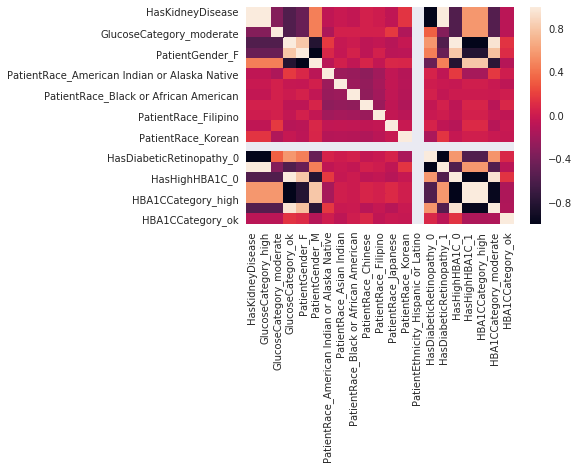

In [64]:
#HeatMap for OneHotEncoding
sns.heatmap(dfDiabetesStudySelectedOneHot.corr())
plt.show()

# Creating Test and Train split

In [42]:
##X - > Samples and Features
##Y - > Samples
HasReadmissionX = dfDiabetesStudySelectedOneHot.iloc[:,1:]
HasReadmissionY = dfDiabetesStudySelectedOneHot.iloc[:,0]
HasReadmissionX_train, HasReadmissionX_test, HasReadmissionY_train, HasReadmissionY_test = train_test_split(HasReadmissionX, HasReadmissionY, test_size=0.5)



In [ ]:
HasReadmissionX

In [43]:
HasReadmissionX_train.shape


(100, 20)

In [44]:
classifier = LogisticRegression()
classifier.fit(HasReadmissionX_train,HasReadmissionY_train)
# check the accuracy on the training set
#classifier.score(HasReadmissionX_test, HasReadmissionY_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

1.0

In [45]:
HasReadmissionY_train.mean()

0.23000000000000001

In [21]:
HasReadmissionX_train.columns

Index(['GlucoseCategory_high', 'GlucoseCategory_moderate',
       'GlucoseCategory_ok', 'PatientGender_F', 'PatientGender_M',
       'PatientRace_American Indian or Alaska Native',
       'PatientRace_Asian Indian', 'PatientRace_Black or African American',
       'PatientRace_Chinese', 'PatientRace_Filipino', 'PatientRace_Japanese',
       'PatientRace_Korean', 'PatientEthnicity_Hispanic or Latino',
       'HasDiabeticRetinopathy_0', 'HasDiabeticRetinopathy_1',
       'HasHighHBA1C_0', 'HasHighHBA1C_1', 'HBA1CCategory_high',
       'HBA1CCategory_moderate', 'HBA1CCategory_ok'],
      dtype='object')

In [16]:
classifier.coef_

array([[-1.32405498, -1.32405498,  1.13534   ,  0.61078335,  0.43390895,
        -0.01184058,  0.04891458,  0.06063787,  0.14325911,  0.07339875,
         0.09583046,  0.06452483, -0.06449724,  0.42206837,  1.74612335,
        -1.32405498,  0.61078335, -0.18871498, -0.18871498,  0.56683163,
         0.04395172]])

In [46]:
pd.DataFrame(list(zip(HasReadmissionX_train.columns, np.transpose(classifier.coef_))))

,0,1
0,GlucoseCategory_high,[1.39429025617]
1,GlucoseCategory_moderate,[-1.12091511796]
2,GlucoseCategory_ok,[-0.605884099592]
3,PatientGender_F,[-0.40473310961]
4,PatientGender_M,[0.0722241482314]
5,PatientRace_American Indian or Alaska Native,[-0.127201943949]
6,PatientRace_Asian Indian,[0.012141627288]
7,PatientRace_Black or African American,[-0.251177769122]
8,PatientRace_Chinese,[0.0433038873558]
9,PatientRace_Filipino,[-0.0342665244857]


In [47]:
# predict class labels for the test set
predicted = classifier.predict(HasReadmissionX_test)
print(predicted)

[0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0
 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1]


In [48]:
# generate class probabilities
probs = classifier.predict_proba(HasReadmissionX_test)
print(probs)

[[ 0.99096759  0.00903241]
 [ 0.94534214  0.05465786]
 [ 0.99009662  0.00990338]
 [ 0.05809412  0.94190588]
 [ 0.99201234  0.00798766]
 [ 0.98930637  0.01069363]
 [ 0.94534214  0.05465786]
 [ 0.99096759  0.00903241]
 [ 0.95870871  0.04129129]
 [ 0.06815798  0.93184202]
 [ 0.06248709  0.93751291]
 [ 0.94693014  0.05306986]
 [ 0.07646615  0.92353385]
 [ 0.94921452  0.05078548]
 [ 0.99096759  0.00903241]
 [ 0.05401103  0.94598897]
 [ 0.99201234  0.00798766]
 [ 0.06815798  0.93184202]
 [ 0.98963107  0.01036893]
 [ 0.94534214  0.05465786]
 [ 0.94921452  0.05078548]
 [ 0.98930637  0.01069363]
 [ 0.98552719  0.01447281]
 [ 0.06815798  0.93184202]
 [ 0.05982296  0.94017704]
 [ 0.95351209  0.04648791]
 [ 0.99096759  0.00903241]
 [ 0.95870871  0.04129129]
 [ 0.94534214  0.05465786]
 [ 0.94693014  0.05306986]
 [ 0.94534214  0.05465786]
 [ 0.07646615  0.92353385]
 [ 0.98153422  0.01846578]
 [ 0.98930637  0.01069363]
 [ 0.98930637  0.01069363]
 [ 0.94921452  0.05078548]
 [ 0.99009662  0.00990338]
 

# Compute confusion matrix to evaluate the accuracy of a classification
#By definition a confusion matrix C is such that C_{i, j} is equal to the number of observations known to be in group i but predicted to be in group j.
#Thus in binary classification, the count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.


In [23]:
HasReadmissionY_pred=classifier.predict(HasReadmissionX_test)

from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(HasReadmissionY_test,HasReadmissionY_pred)
print(confusion_matrix)

[[43  0]
 [ 0  7]]


In [52]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(HasReadmissionX_test, HasReadmissionY_test)))


Accuracy of logistic regression classifier on test set: 1.00


In [53]:
from sklearn.decomposition import PCA
HasReadmissionX = dfDiabetesStudySelectedOneHot.iloc[:,0:]
HasReadmissionY = dfDiabetesStudySelectedOneHot.iloc[:,1]

pca = PCA(n_components=2).fit_transform(HasReadmissionX)
HasReadmissionX_train, HasReadmissionX_test, HasReadmissionY_train, HasReadmissionY_test = train_test_split(pca, HasReadmissionY, random_state=0)
plt.figure(dpi=120)
plt.scatter(pca[HasReadmissionX.values==0,0], pca[HasReadmissionX.values==0,1], alpha=0.5, label='YES', s=2, color='navy')
plt.scatter(pca[HasReadmissionX.values==1,0], pca[HasReadmissionX.values==1,1], alpha=0.5, label='NO', s=2, color='darkorange')
plt.legend()
plt.title('Patients Dataset\nKidney failure')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

IndexError: too many indices for array

In [55]:
def plot_bank(X, y, fitted_model):
    plt.figure(figsize=(9.8,5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)
        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))

        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.8, label='YES', s=5, color='navy')
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.8, label='NO', s=5, color='darkorange')
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');

    plt.tight_layout()
    plt.legend()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

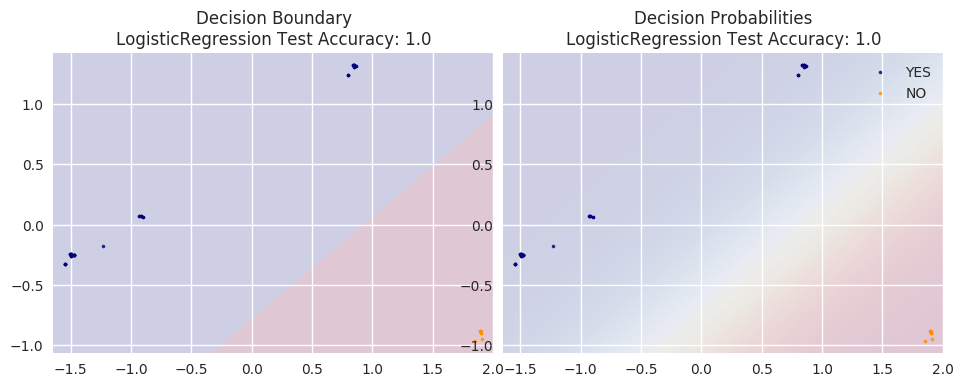

In [56]:
model = LogisticRegression()
model.fit(HasReadmissionX_train,HasReadmissionY_train)
plot_bank(HasReadmissionX_test, HasReadmissionY_test, model)
plt.show()